# 1. Load the Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sheet=pd.read_csv('road_accidents_czechia_2016_2022.csv')
sheet.head()

C:\Users\bachw\AppData\Local\Temp\ipykernel_3676\3756773040.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,communication_kind,date,time,accident_kind,crash_kind,fixed_precaution_kind,injury,cause_of_accident,alcohol,...,way_of_releasing_persons_from_the_vehicle,direction_of_movement,damage_to_the_vehicle(in_hundred_crowns),driver_category,driver_condition,driver_external_influence,city,street,road_type,location
0,6.004418e+10,Highways,2018-01-01,1625.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,800.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
1,6.004418e+10,Highways,2018-02-02,850.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,ne,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,600.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
2,6.004418e+10,Highways,2018-03-01,1959.0,collision with forest animals,not an option It is not a collision between mo...,not an option not a collision with a fixed obs...,0.0,"forest game, domestic animals",not detected,...,there was no need to use violence,moving vehicle - in the measure of stationary ...,300.0,with a driving licence of category B,good no adverse circumstances were found,the driver was not affected,outside the municipality,NaN,Highways,outside the village
3,6.004418e+10,Highways,2018-04-06,2560.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,not detected,...,"undetected, driver drove off","undetected, driver drove off",0.0,"undetected, driver drove off","undetected, driver drove off","undetected, driver drove off",outside the municipality,NaN,Highways,outside the village
4,6.004418e+10,Highways,2018-04-18,2560.0,collision with a fixed obstacle,not an option It is not a collision between mo...,lever,0.0,driver of a motor vehicle,not detected,...,"undetected, driver drove off","undetected, driver drove off",0.0,"undetected, driver drove off","undetected, driver drove off","undetected, driver drove off",outside the municipality,NaN,Highways,outside the village


# 2. Check the Shape of the data 

In [2]:
sheet.shape

(707027, 46)

# 3. Check the information about the data 

In [3]:

sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707027 entries, 0 to 707026
Data columns (total 46 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   id                                                             700689 non-null  float64
 1   communication_kind                                             700689 non-null  object 
 2   date                                                           700689 non-null  object 
 3   time                                                           700689 non-null  float64
 4   accident_kind                                                  700689 non-null  object 
 5   crash_kind                                                     700689 non-null  object 
 6   fixed_precaution_kind                                          700689 non-null  object 
 7   injury                                         

# 4. Extract the date, month , year and day of week from the date columns 

In [4]:
sheet['date'] = pd.to_datetime(sheet['date'])
sheet['day'] = sheet['date'].dt.day.fillna(0).astype(int)
sheet['day_of_week'] = sheet['date'].dt.dayofweek.fillna(0).astype(int)
sheet['day_of_week'] = sheet['day_of_week'] + 1
sheet['month'] = sheet['date'].dt.month.fillna(0).astype(int)
sheet['year'] = sheet['date'].dt.year.fillna(0).astype(int)

sheet[['date','day','day_of_week','month','year']].head()

,date,day,day_of_week,month,year
0,2018-01-01,1,1,1,2018
1,2018-02-02,2,5,2,2018
2,2018-03-01,1,4,3,2018
3,2018-04-06,6,5,4,2018
4,2018-04-18,18,3,4,2018


# 5. Bar graph of the number of killed person, severely_injured_persons ,slightly_injured_persons on  per day 

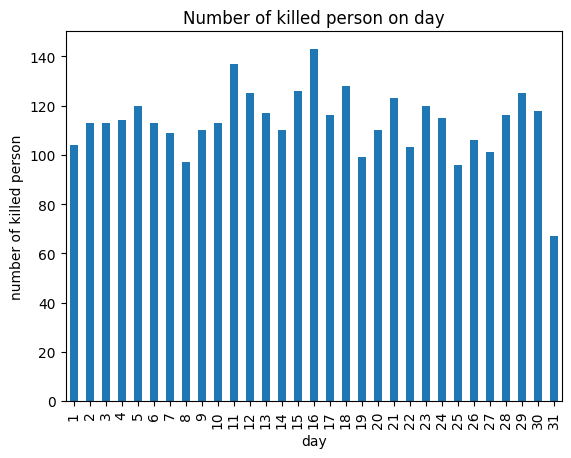

In [5]:
a=sheet[sheet['day']!=0]
a.groupby('day')['killed_persons'].sum().plot.bar(x='day', y='killed_person')
plt.title('Number of killed person on day')
plt.ylabel('number of killed person')
d=a.groupby('day')['killed_persons'].sum()

Text(0, 0.5, 'number of severely_injured_persons')

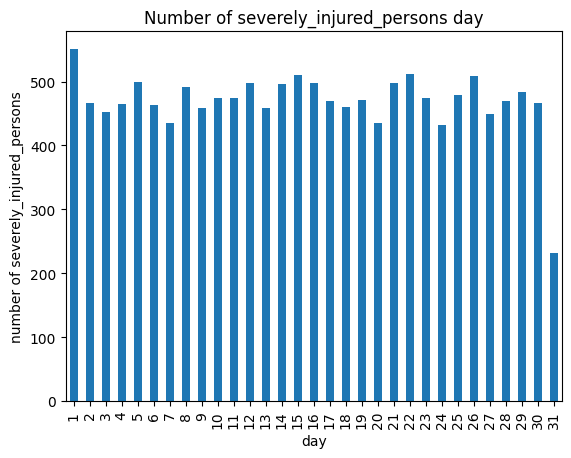

In [6]:
a=sheet[sheet['day']!=0]
a.groupby('day')['severely_injured_persons'].sum().plot.bar(x='day', y='severely_injured_persons')
plt.title('Number of severely_injured_persons day')
plt.ylabel('number of severely_injured_persons')

Text(0, 0.5, 'number of slightly_injured_persons')

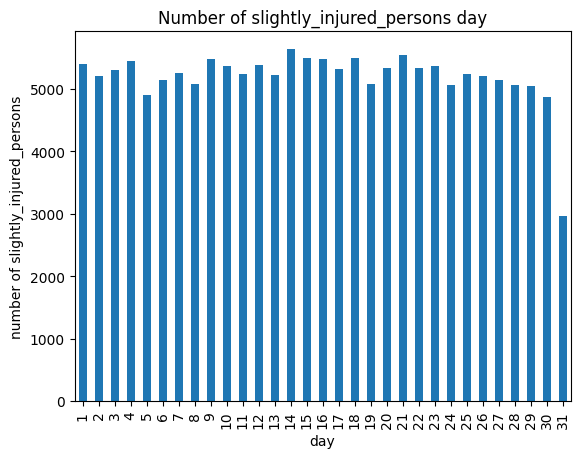

In [7]:
a=sheet[sheet['day']!=0]
a.groupby('day')['slightly_injured_persons'].sum().plot.bar(x='day', y='slightly_injured_persons')
plt.title('Number of slightly_injured_persons day')
plt.ylabel('number of slightly_injured_persons')

# 6. Bar graph of the number of killed person, severely_injured_persons ,slightly_injured_persons on per Month 

Text(0, 0.5, 'number of killed person')

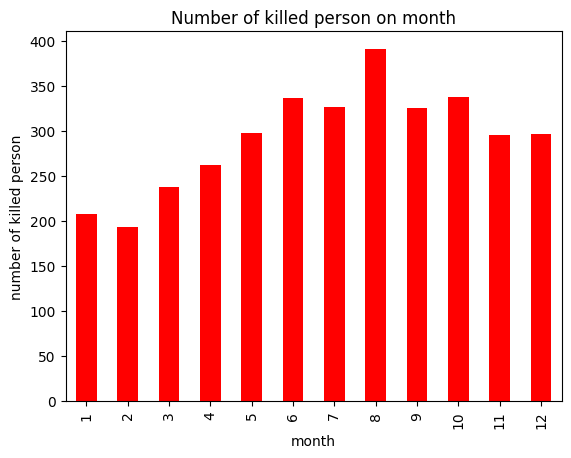

In [8]:
a=sheet[sheet['month']!=0]
a.groupby('month')['killed_persons'].sum().plot.bar(x='month', y='killed_person',color='red')
plt.title('Number of killed person on month')
plt.ylabel('number of killed person')

Text(0, 0.5, 'number of severely_injured_persons')

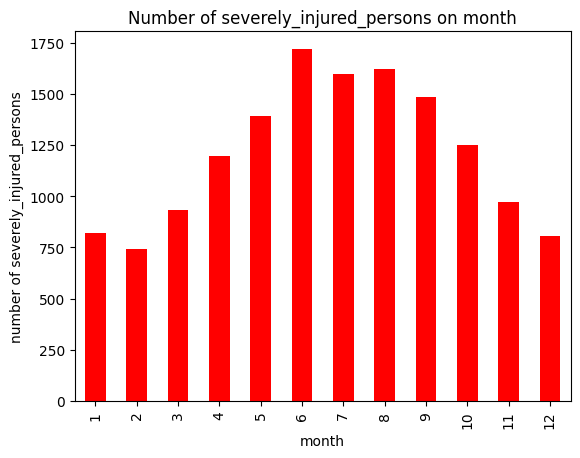

In [9]:
a=sheet[sheet['month']!=0]
a.groupby('month')['severely_injured_persons'].sum().plot.bar(x='month', y='severely_injured_persons',color='red')
plt.title('Number of severely_injured_persons on month')
plt.ylabel('number of severely_injured_persons')

Text(0, 0.5, 'number of slightly_injured_persons')

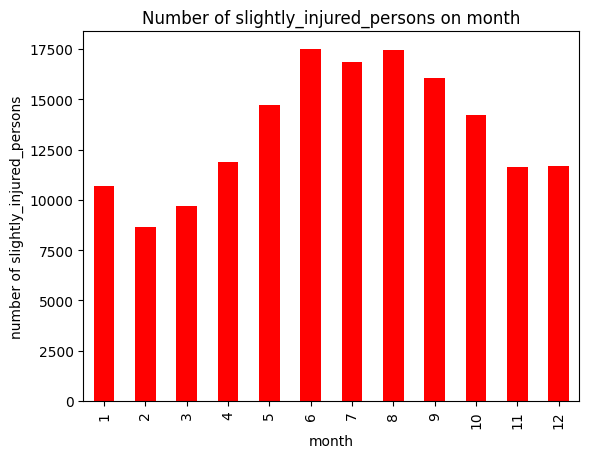

In [10]:
a=sheet[sheet['month']!=0]
a.groupby('month')['slightly_injured_persons'].sum().plot.bar(x='month', y='slightly_injured_persons',color='red')
plt.title('Number of slightly_injured_persons on month')
plt.ylabel('number of slightly_injured_persons')

# 7. Bar graph of the number of killed person, severely_injured_persons ,slightly_injured_persons on per Year 

Text(0, 0.5, 'number of killed person')

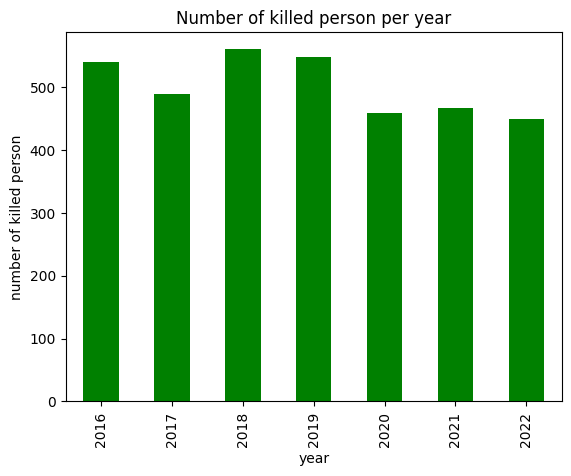

In [11]:
a=sheet[sheet['year']!=0]
a.groupby('year')['killed_persons'].sum().plot.bar(x='year', y='killed_person',color='green')
plt.title('Number of killed person per year')
plt.ylabel('number of killed person')

Text(0, 0.5, 'number of severely_injured_persons')

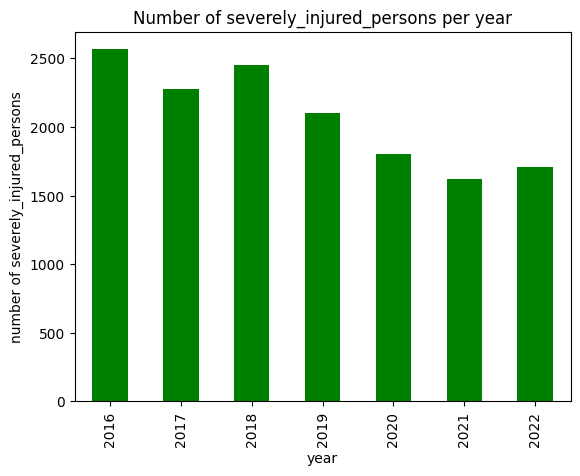

In [12]:
a=sheet[sheet['year']!=0]
a.groupby('year')['severely_injured_persons'].sum().plot.bar(x='year', y='severely_injured_persons',color='green')
plt.title('Number of severely_injured_persons per year')
plt.ylabel('number of severely_injured_persons')

Text(0, 0.5, 'number of slightly_injured_persons')

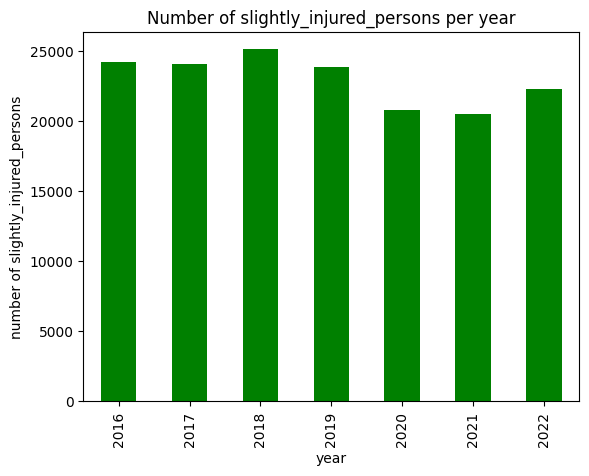

In [13]:
a=sheet[sheet['year']!=0]
a.groupby('year')['slightly_injured_persons'].sum().plot.bar(x='year', y='sslightly_injured_persons',color='green')
plt.title('Number of slightly_injured_persons per year')
plt.ylabel('number of slightly_injured_persons')

# 8. what is the driver condition at the time of accident happened?

In [14]:
a=sheet[sheet['driver_condition']!='undetected, driver drove off']
a.groupby('driver_condition')['driver_condition'].count().sort_values(ascending=False)

driver_condition
good no adverse circumstances were found                              512728
under the influence of alcohol, blood alcohol content 1‰ or more       24267
under the influence of alcohol, blood alcohol content up to 0,99 ‰      6672
other adverse condition                                                 3090
under the influence of drugs, narcotics                                 2202
illness, accident, etc.                                                  521
the driver died while driving (heart attack, etc.)                       365
invalid                                                                  230
suicide attempt, suicide                                                  75
Name: driver_condition, dtype: int64

# 9. Type of road surface 

In [15]:
a=sheet[sheet['year']!=0]
a.groupby('road_surface_type')['road_surface_type'].count().sort_values(ascending=False)

road_surface_type
resins                   630931
paving                    41810
beton                     15096
Gravel                     6247
other unpaved surface      3199
panely                     1369
Name: road_surface_type, dtype: int64

# 10. Road type

In [16]:
a=sheet[sheet['year']!=0]
a.groupby('road_type')['road_type'].count().sort_values(ascending=False).head(7)

road_type
LocalCommunications        278118
class 2 roads              108180
class 1 roads               99933
class 3 roads               92252
sledovanacommunications     51071
Highways                    26205
node                        24781
Name: road_type, dtype: int64

# 11. what is the cause of accident?

In [17]:
a=sheet[sheet['year']!=0]
a.groupby('cause_of_accident')['cause_of_accident'].count().sort_values(ascending=False)


cause_of_accident
driver of a motor vehicle            569737
forest game, domestic animals         95452
driver of a non-motorised vehicle     19918
pedestrian                             6796
other fault                            3263
technical defect of the vehicle        2679
communication fault                    1775
by another road user                   1069
Name: cause_of_accident, dtype: int64

# 12. type of licence or driver category who involve in the accidents 

In [18]:
a=sheet[(sheet['driver_category'] != 'not detected (e.g. for foreigners)') & (sheet['driver_category'] != 'undetected, driver drove off') & (sheet['driver_category'] != 'passenger car without trailer') & (sheet['driver_category'] != 'not detected, the driver left the scene (code 17 for p44 or code 4 for p50a)')]
driver=a.groupby('driver_category')['driver_category'].count().sort_values(ascending=False)
print(driver)


driver_category
with a driving licence of category B                                       368768
with a driving licence of category C                                       125584
with a driving licence of category D                                        29348
other vehicle drivers (e.g. cyclists, car drivers, train drivers, etc.)     21816
without a driving licence                                                    7588
with a driving licence of category A                                         1594
with a driving licence of group T                                             291
with a driving licence of category A and with a limit of up to 50 cc          213
Name: driver_category, dtype: int64


# 13. vehicle type which involve in accidents 

vehicle_type
truck (including multi-car, crane, tanker, etc.)                              58743
truck with trailer                                                            28354
bicycle                                                                       19250
motorcycle (including sidecars, scooters, etc.)                               13013
bus                                                                           10230
passenger car with trailer                                                     4039
tractor (with trailer)                                                         2353
other motor vehicle (agricultural, forestry, construction machinery, etc.)     1655
Tram                                                                           1494
trolleybus                                                                      597
other non-motorised vehicle                                                     578
scooter                                                        

Text(0.5, 1.0, 'Vehicle Type Distribution')

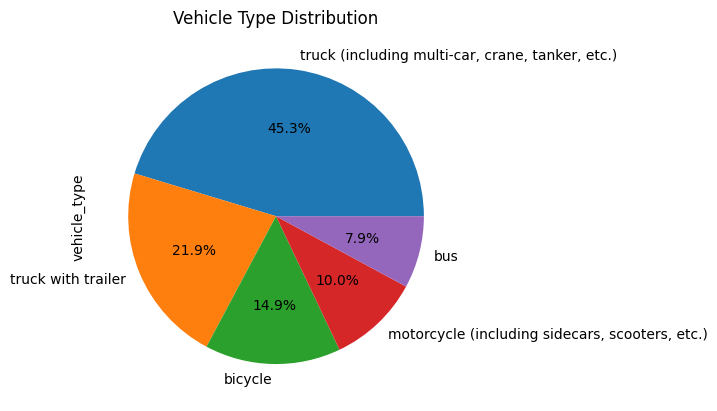

In [19]:
a=sheet[(sheet['vehicle_type'] != 'undetected, driver drove off') & (sheet['vehicle_type'] != 'passenger car without trailer')]
# print(sheet['vehicle_type']!="undetected, driver drove off")

vcount=a.groupby('vehicle_type' )['vehicle_type'].count().sort_values(ascending = False)
print (vcount)
vcount.sort_values(ascending=False).head(5).plot.pie(autopct="%1.1f%%")
plt.title("Vehicle Type Distribution")

